         Date  Predicted_Max_Temp
0  2024-08-28           11.230815
1  2024-08-29           13.469900
2  2024-08-30            9.583346
3  2024-08-31            7.911295
4  2024-09-01            4.952858
5  2024-09-02            4.229132
6  2024-09-03            3.825365
7  2024-09-04            8.215552
8  2024-09-05            2.815184
9  2024-09-06            5.010075
Predictions for the next 200 days saved to ./results/future_tempmax_predictions_200_days.csv


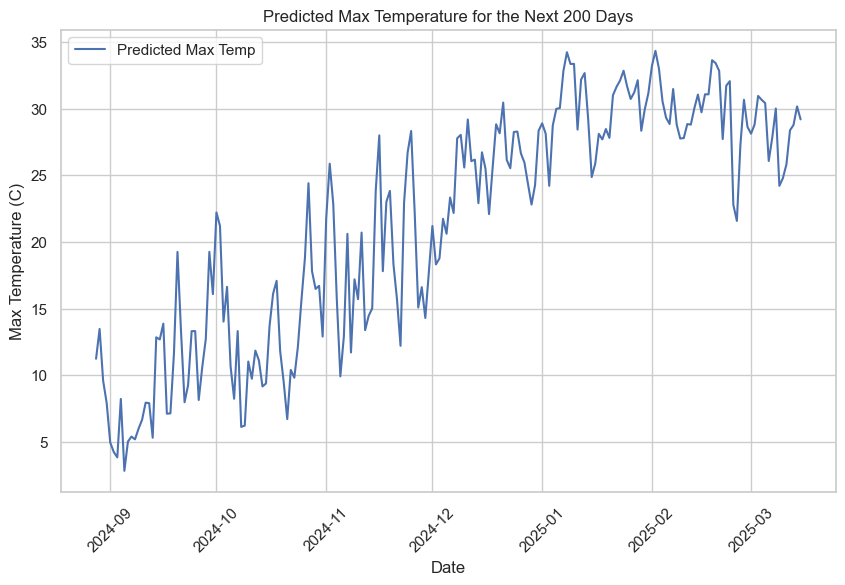

In [5]:
# Filename: future_prediction.ipynb

import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the trained model
model_path = "./models/xgboost_model_with_tuning.pkl"
with open(model_path, 'rb') as file:
    best_xgboost_model = pickle.load(file)

# 1. Load the Full Processed Data
processed_data = pd.read_csv("./preprocessing/processed_data.csv")

# Ensure all features are numeric
processed_data = processed_data.select_dtypes(include=[np.number])

# Remove the 'tempmax' column since it's the target
X_future = processed_data.drop(columns=['tempmax'])

# Use the last 200 rows of X_future for prediction
X_future = X_future.tail(200)

# 2. Predict Maximum Temperature for the Next 200 Days
future_tempmax_predictions = best_xgboost_model.predict(X_future)

# Generate sequential future dates for the next 200 days
future_dates = pd.date_range(start=pd.Timestamp.today(), periods=200, freq='D')

# Create a DataFrame to store the predictions with corresponding dates
predictions_df = pd.DataFrame({
    'Date': future_dates.date, 
    'Predicted_Max_Temp': future_tempmax_predictions
})

# Display the first 10 predictions
print(predictions_df.head(10))

# Save predictions to a CSV file
predictions_df.to_csv("./results/future_tempmax_predictions_200_days.csv", index=False)
print("Predictions for the next 200 days saved to ./results/future_tempmax_predictions_200_days.csv")

# 3. Visualize the Predictions
plt.figure(figsize=(10, 6))
plt.plot(predictions_df['Date'], predictions_df['Predicted_Max_Temp'], label="Predicted Max Temp")
plt.legend()
plt.title("Predicted Max Temperature for the Next 200 Days")
plt.xlabel("Date")
plt.ylabel("Max Temperature (C)")
plt.xticks(rotation=45)
plt.show()
